<h1>Numerical Transformations</h1>

In order to perform numerical transformation we can use:
- `Standardization`
- `Normalization`

<h1>Standardization (Z-Transformations)</h1>

Standardization is a numerical data transformation wherein after the transformation the mean `μ ≃ 0` and standard deviation `σ ≃ 1`.<br>
Steps to perform standardization:
1. Compute the mean and standard deviation of each column.
2. Apply Z-Transformation:<br>
$$∀ Column_i → \frac{obs - μ_i}{σ_i}
$$

Now in order to better understand the above steps, lets take an example:

![Raw Table](https://drive.google.com/uc?export=view&id=1uBGReZZTPvMlB2ZxBXgfsBcDnJsPilnC)

- The x1 column contains the height of 8 individuals and y1 contains the weight of those individuals.

Lets plot and see how the data looks like.

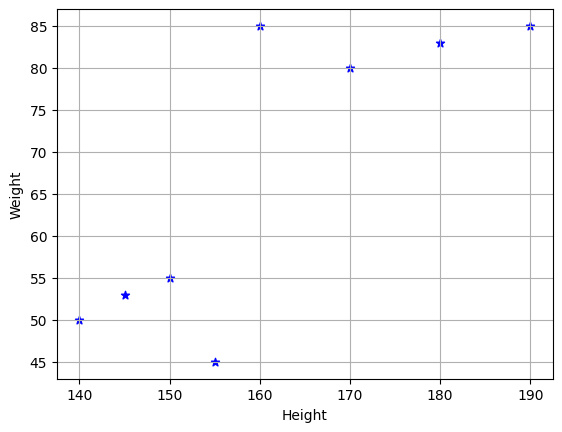

In [ ]:
import matplotlib.pyplot as plt

x = [160,140,150,155,145,170,180,190]
y = [85,50,55,45,53,80,83,85]

plt.scatter(x,y,c="b",marker='*',label="Height and Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid("True")
plt.show()

Now lets compute the mean and standard deviation of the given data for both columns, followed by its standardization.

In [ ]:
import numpy as np
import pprint

x = [160,140,150,155,145,170,180,190]
y = [85,50,55,45,53,80,83,85]

mx = sum(x)/len(x) # mean for x
my = sum(y)/len(y) # mean for y

print("Mean for x:",mx,"and Mean for y is:",my)

x_arr = np.array(x)
y_arr = np.array(y)

x_std = x_arr.std()
y_std = y_arr.std()

print("The standard deviation for x is:",x_std,
      "\nand the standard deviation for y is:",y_std)

x_rescaled = []
y_rescaled = []
# Standardizing the values
for i in x:
  temp = (i-mx)/x_std
  x_rescaled.append(temp)

for i in y:
  temp = (i-my)/y_std
  y_rescaled.append(temp)

print("The rescaled value for x is:\n")
pprint.pprint(x_rescaled)
print("\nand rescaled value for y is:\n")
pprint.pprint(y_rescaled)

Mean for x: 161.25 and Mean for y is: 67.0
The standard deviation for x is: 16.345871038277526 
and the standard deviation for y is: 16.53027525481654
The rescaled value for x is:

[-0.07647191129018725,
 -1.3000224919331833,
 -0.6882472016116853,
 -0.3823595564509363,
 -0.9941348467724344,
 0.5353033790313108,
 1.1470786693528088,
 1.758853959674307]

and rescaled value for y is:

[1.0889110872340262,
 -1.0284160268321358,
 -0.7259407248226841,
 -1.3308913288415876,
 -0.8469308456264649,
 0.7864357852245746,
 0.9679209664302456,
 1.0889110872340262]


So now the rescaled data is:

![Rescaled Table](https://drive.google.com/uc?export=view&id=1vG8kMN4W3vQEw8-PgGiFY7tDJ4iJtcoo)

Lets plot the above data:

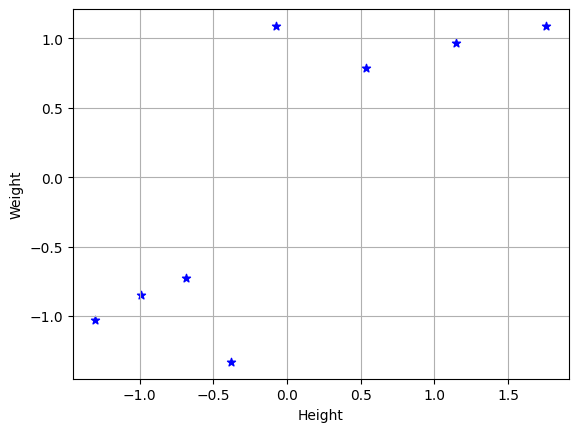

In [ ]:
plt.scatter(x_rescaled,y_rescaled,c="b",marker='*',label="Rescaled Height and Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid("True")
plt.show()

<h3>Observations</h3>

- Post standardization the mean `μ ≃ 0` and standard deviation `σ ≃ 1`.
- Standardization learns from the data and then transforms it.
  - Learning happens in `Step 1` where the mean and standard deviation is computed for each column.
  - Transformation happens in `Step 2` where Z-transformation is applied.

Let's see the implementation in sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

rescaled_x = scaler.fit_transform(np.array(x).reshape(-1,1))

print("The rescaled x via sklearn is:",rescaled_x,sep="\n")
print()
print("Manually rescaled values of x is:")
pprint.pprint(x_rescaled)

The rescaled x via sklearn is:
[[-0.07647191]
 [-1.30002249]
 [-0.6882472 ]
 [-0.38235956]
 [-0.99413485]
 [ 0.53530338]
 [ 1.14707867]
 [ 1.75885396]]

Manually rescaled values of x is:
[-0.07647191129018725,
 -1.3000224919331833,
 -0.6882472016116853,
 -0.3823595564509363,
 -0.9941348467724344,
 0.5353033790313108,
 1.1470786693528088,
 1.758853959674307]


<h3>Observation</h3>

- As we can see from the above output both sklearn and hard code method gives the same result.
- However in real-time we will have train and test data and this is where things get interesting.

<h2>How to perform numerical transformations on train and test data?</h2>

- The `fit` step of standardization is only supposed to be applied on training data and not on test data.

Let's see it with an example:

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

train_x = [160,140,150,155,180,190]
test_x = [145,170]

scaler = StandardScaler()

# Standardizing train data
rescaled_train_x = scaler.fit_transform(np.array(train_x).reshape(-1,1))
print("The rescaled train x is:",rescaled_train_x,sep="\n")

# Wrong way of standardizing test data
wrong_test_x = scaler.fit_transform(np.array(test_x).reshape(-1,1))
print("\nWrong standardized test x:",wrong_test_x,sep="\n")

The rescaled train x is:
[[-0.14484136]
 [-1.30357228]
 [-0.72420682]
 [-0.43452409]
 [ 1.01388955]
 [ 1.59325501]]

Wrong standardized test x:
[[-1.]
 [ 1.]]


In [ ]:
# Correct way of applying standardization
import numpy as np
from sklearn.preprocessing import StandardScaler

train_x = [160,140,150,155,180,190]
test_x = [145,170]

scaler = StandardScaler()

# Standardizing train data
rescaled_train_x = scaler.fit_transform(np.array(train_x).reshape(-1,1))
print("The rescaled train x is:",rescaled_train_x,sep="\n")

# Standardizing test data
rescaled_test_x = scaler.transform(np.array(test_x).reshape(-1,1))
print("\nStandardized test x:",rescaled_test_x,sep="\n")

The rescaled train x is:
[[-0.14484136]
 [-1.30357228]
 [-0.72420682]
 [-0.43452409]
 [ 1.01388955]
 [ 1.59325501]]

Standardized test x:
[[-1.01388955]
 [ 0.43452409]]


<h3>Let's understand what just happened:</h3>

- The reason `fit_transform()` gave wrong answer on `test_x` is because of the `fit` part of the function where it recomputed the mean for the test data.
- This is a bad as it is similar to showing the question paper to students before the test itself is conducted as a result we end up with a very famous problem of `DATA LEAKAGE`.
- The correct way is to learn from the train data, i.e. the mean `μ` and standard deviation `σ` of train data; and use these `μ` and `σ` to compute the rescaled value for test data.


<h1>Summary of Standardization</h1>

1. <b>fit()</b> → `Step 1` : Compute the mean and standard deviation for each input column in the given data.
2. <b>transform()</b> → `Step 2` : Apply Z-transformation.

- In real time when working on M.L. problem statements, we will always have train and test data:
  - To rescale train data → apply `fit_transform()` of `StandardScaler` object.
  - To rescale test data → apply `transform()` of `StandardScaler` object.
- It is important to note that before applying standardization it is important to split the data into train and test.
  - The split is important as the `data contains` both `train data` points and `test data` points.
  - Now if standardize without splitting the data, then the mean and standard deviation will contain the influence of test data points as well, thereby causing a small amount of `data leakage`.
- Before applying standardization, it is imperative that the `Data Cleaning` step has been performed to the highest degree as possible, because the if there is any outlier or bad data point, it will impact the mean which in turn will impact the standard deviation negatively respectively. As a result the rescaling will not be of good quality.

<h1> Normalization</h1>

It is also known as `min max transformation`.

Normalization is a technique to rescale numerical data and it has the following steps:
1. Step 1 → Compute the maximum and minimum value for each column. {This is the fit part}
2. Step 2 → Apply the min max transformation as:  $$∀ Column_i → \frac{obs - min_i}{max_i - min_i}$$

The range of normalization is: `[0,1]` only.<br>
Let's see the code implementation:

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

x = [160,150,155,145,170,180]
y = [140,190]

rescaled_x = normalizer.fit_transform(np.array(x).reshape(-1,1))
print("The normalized version of x is:",rescaled_x,sep="\n")

The normalized version of x is:
[[0.42857143]
 [0.14285714]
 [0.28571429]
 [0.        ]
 [0.71428571]
 [1.        ]]


<h3>Observation</h3>

- As seen in the theory, the output matches with it. The rescaled values are all in the range of [0,1] strictly.

Now lets apply it on test data:

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

x = [160,150,155,145,170,180]
y = [140,190]

rescaled_x = normalizer.fit_transform(np.array(x).reshape(-1,1))
print("The normalized version of x is:",rescaled_x,sep="\n")

rescaled_y = normalizer.transform(np.array(y).reshape(-1,1))
print("\nRescaled values of y is:",rescaled_y,sep="\n")

The normalized version of x is:
[[0.42857143]
 [0.14285714]
 [0.28571429]
 [0.        ]
 [0.71428571]
 [1.        ]]

Rescaled values of y is:
[[-0.14285714]
 [ 1.28571429]]


<h3>Observation</h3>

- When test data is normalized it violates the theoretical range of normalization.

Let's understand why this happened:

The range of normalization is:<br>

$$
0 ≤\frac{obs - min_i}{max_i - min_i}≤1
$$
- Now we have to consider two cases:
  - Case 1:
$$
obs = max_i
$$<br>
In this cases the normalized value will be higest ⇒ 1<br>

  - Case 2:
  $$
  obs = min_i
  $$<br>
In this case the normalized value will the lowest ⇒ 0


- An important point to note here is that normalization is heavily dependent upon the `max` and `min` values of the training data.
- So when any value greater than the `max` value or smaller than the `min` value in the test data, these <b><u>values act like outliers</u></b> and completely violates the rules and range of normalization.

<h2>Standardization V/S Normalization</h2>

| Standardization | Normalization |
| --------------- | ------------- |
| It learns about `mean` and `standard deviation` of each column. | It learns about `min` and `max` of each column. |
| It is computationally more costly because it has to compute mean and standard deviation for each column. | It is computationally cheap as it only needs min max value for each column. |
| The impact of outliers in test data is not that severe. | It is seriously impacted by outliers in test data. |

<b><u>NOTE</u>: IN CASE YOU ARE NOT SURE ABOUT OUTLIERS AND THE MAXIMUM AND MINIMUM VALUES CAN CHANGE, TRY TO GO FOR ROBUST SCALER WHICH UTILIZES MEDIAN AND IQR TO RESCALE THE DATA.</b>

<br>

<br>
<br>
<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>